In [2]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
import pandas as pd

import os

from config import *

In [3]:

assert os.path.exists(RULE_FOLDER), f"Folder {RULE_FOLDER} does not exist"

rules = os.listdir(RULE_FOLDER)
logging.info(f"Found {len(rules)} rules")

NameError: name 'logging' is not defined

In [ ]:
df_exps_all = pd.read_csv("experiments.csv")
df_exps_all 

,datetime,name,MAF method,dataset,breaks,mult_rules,accuracy,f1,confusion_matrix,training_time,epochs,min_loss,all_losses,clustering_alg,label_for_dist
0,03-05-2024 01:43:02,"dataset=gaussian_df, label_for_dist=labels, cl...",clustering,gaussian_df,3,False,0.966667,0.969325,[[66 5]\n [ 0 79]],10.889764,104,0.014499,"[0.07791690528392792, 0.07534867525100708, 0.0...",dbscan,labels
1,03-05-2024 01:43:34,"dataset=gaussian_df, label_for_dist=labels, cl...",random,gaussian_df,3,False,0.986667,0.987500,[[69 2]\n [ 0 79]],31.562034,254,0.022637,"[0.24364665150642395, 0.23870016634464264, 0.2...",dbscan,labels
2,03-05-2024 01:44:01,"dataset=gaussian_df, label_for_dist=labels, cl...",uniform,gaussian_df,3,False,0.986667,0.987500,[[69 2]\n [ 0 79]],26.365398,190,0.023795,"[0.25, 0.2432374805212021, 0.23658305406570435...",dbscan,labels
3,03-05-2024 01:46:47,"dataset=gaussian_df, label_for_dist=labels, cl...",clustering,gaussian_df,3,False,0.966667,0.969325,[[66 5]\n [ 0 79]],22.942944,104,0.014499,"[0.07791690528392792, 0.07534867525100708, 0.0...",dbscan,labels
4,03-05-2024 01:47:40,"dataset=gaussian_df, label_for_dist=labels, cl...",random,gaussian_df,3,False,0.986667,0.987500,[[69 2]\n [ 0 79]],52.276700,277,0.024150,"[0.2889140248298645, 0.2832852900028229, 0.277...",dbscan,labels
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,03-05-2024 21:14:14,"dataset=uniform_df, label_for_dist=labels, clu...",uniform,uniform_df,3,False,0.973333,0.969697,[[82 0]\n [ 4 64]],27.275186,233,0.037740,"[0.25, 0.24619323015213013, 0.2424470335245132...",NaN,labels
75,03-05-2024 21:14:37,"dataset=wine, label_for_dist=labels, clust=kme...",clustering,wine,3,False,0.996410,0.990424,[[1581 3]\n [ 4 362]],14.356473,9,0.062299,"[0.16248232573893454, 0.14651414546857489, 0.1...",kmeans,labels
76,03-05-2024 21:18:05,"dataset=wine, label_for_dist=labels, clust=dbs...",clustering,wine,3,False,1.000000,1.000000,[[1584 0]\n [ 0 366]],193.403698,131,0.002237,"[0.7640313693316712, 0.746394235326978, 0.7215...",dbscan,labels
77,03-05-2024 21:22:09,"dataset=wine, label_for_dist=labels, clust=Non...",random,wine,3,False,1.000000,1.000000,[[1584 0]\n [ 0 366]],243.065462,145,0.002120,"[0.24816387935027673, 0.20808695246223202, 0.1...",NaN,labels


In [ ]:
def get_pairs(rules):
    pairs = []
    for rule1 in rules:
        if 'maf_method' in rule1:
            for rule2 in rules:
                if rule1 == rule2 or (rule2, rule1) in pairs:
                    continue
                if rule2.startswith(rule1.split('maf_method')[0]):
                    pairs.append((rule1, rule2))
    return pairs

def extract_res(rules_info):
    rules = rules_info["preds"]
    mafs = rules_info["masses"]
    
    rule_names = [str(i) for i in rules]
    mass_first = [float(i[0]) for i in mafs]
    mass_second = [float(i[1]) for i in mafs]
    uncertainty = [float(i[2]) for i in mafs]
    
    res = {"rule": rule_names, "mass_first": mass_first, "mass_second": mass_second, "uncertainty": uncertainty}
    return res

In [ ]:
lst = ["dataset=Brain Tumor, label_for_dist=labels, clust=kmeans breaks=3, add_mult_rules=False, maf_method=clustering", 
"dataset=Brain Tumor, label_for_dist=labels, clust=kmeans breaks=3, add_mult_rules=False, maf_method=random",
"dataset=breast-cancer-wisconsin, label_for_dist=labels, clust=kmeans breaks=3, add_mult_rules=False, maf_method=clustering",
"dataset=breast-cancer-wisconsin, label_for_dist=labels, clust=kmeans breaks=3, add_mult_rules=False, maf_method=random",
"dataset=gaussian_df, label_for_dist=labels, clust=kmeans breaks=3, add_mult_rules=False, maf_method=clustering",
"dataset=gaussian_df, label_for_dist=labels, clust=kmeans breaks=3, add_mult_rules=False, maf_method=random",
"dataset=rectangle_df, label_for_dist=labels, clust=kmeans breaks=3, add_mult_rules=False, maf_method=clustering",
"dataset=rectangle_df, label_for_dist=labels, clust=kmeans breaks=3, add_mult_rules=False, maf_method=random",
"dataset=uniform_df, label_for_dist=labels, clust=kmeans breaks=3, add_mult_rules=False, maf_method=clustering",
"dataset=uniform_df, label_for_dist=labels, clust=kmeans breaks=3, add_mult_rules=False, maf_method=random"]

lst = df_exps_all.name.tail(42).to_list()
len(lst)

42

In [13]:
pairs = get_pairs(rules)

In [14]:

def filter_pairs(pairs, allowed_lst):
    relevant = []
    for i, j in pairs:
        if i.split(".")[0] in allowed_lst and j.split(".")[0] in allowed_lst:
            relevant.append((i, j)) 
            
    return relevant


pairs_new = filter_pairs(pairs,lst)
len(pairs_new)


0

In [15]:


rule_dfs_all = {}

for r1, r2 in pairs_new:
    print(r1, r2, sep="\n")
    r1_info = pickle.load(open(os.path.join(RULE_FOLDER, r1), "rb"))
    r2_info = pickle.load(open(os.path.join(RULE_FOLDER, r2), "rb"))
    
    r1_df = pd.DataFrame(extract_res(r1_info))
    r2_df = pd.DataFrame(extract_res(r2_info))
    
    
    merged = pd.merge(r1_df, r2_df, on="rule", suffixes=('_kmeans', '_random'))
    # merged.to_csv(f"rules_{r1}_{r2}.csv", index=False)
    # print(merged)
    # print(f"Num rules {len(merged)}")
    # fig = px.bar(merged, x='rule', y=['uncertainty_kmeans', 'uncertainty_random'], 
    #     title='Uncertainty comparison between kmeans and random', # put bars next to each other
    #     barmode='group')
    # fig.write_html(f"{r1}_{r2}.html")
    rule_dfs_all[r1] = merged 
    # fig.show()

In [17]:
rule_dfs_all

{}

In [11]:

# d.to_latex()

datasets = os.listdir("datasets")
datasets

['Brain Tumor.csv',
 'breast-cancer-wisconsin.csv',
 'gaussian_df.csv',
 'rectangle_df.csv',
 'uniform_df.csv',
 'wine.csv']

In [30]:
def perform_all_for_dataset(rule_dfs_all, df_exps_all, dataset, clust_alg="kmeans"):
    rule_dfs = {k: v for k, v in rule_dfs_all.items() if dataset in k and clust_alg in k}
    print(f"Found {len(rule_dfs) * 2} experiments for dataset {dataset}")
    
    df_exps = df_exps_all[(df_exps_all.dataset == dataset) & (df_exps_all.clustering_alg == clust_alg)]
    
    plots_lst = os.listdir(PLOT_FOLDER)
    plots_exp = [i for i in plots_lst if dataset in i and clust_alg in i]

    assert len(rule_dfs) * 2 == len(df_exps) == len(plots_exp), f"Lengths do not match {len(rule_dfs) * 2} {len(df_exps)} {len(plots_exp)}"
    
    # all_losses = df_exps.all_losses
    
    losses_random = eval(df_exps[df_exps["MAF method"] == "random"].all_losses.values[0])
    epochs_random = list(range(1, len(losses_random)+1))
    
    
    losses_kmeans = eval(df_exps[df_exps["MAF method"] == "clustering"].all_losses.values[0])
    epochs_kmeans = list(range(1, len(losses_kmeans)+1))
    
    plt.style.use('ggplot')
    plt.plot(epochs_random, losses_random, label="Random")
    plt.plot(epochs_kmeans, losses_kmeans, label="Kmeans")
    plt.legend()

    plt.xlabel('Epochs')
    plt.ylabel('Loss')    
    plt.title(f"{DATASET_NAME_MAP[dataset]} dataset | Loss over epochs per MAF method")
    plt.savefig(f"paper/{dataset}_loss.png", dpi=800)
    plt.show()    
    
    cols = ['dataset', "clustering_alg", "MAF method", "accuracy", "f1", "training_time", "epochs", "min_loss"]

        
    rules_name = list(rule_dfs.keys()) 
    rules_df = rule_dfs[rules_name[0]]
    # # custom scoring
    # for method in ["kmeans", "random"]: 
    #     rules_df[f'ratio_{method}'] = np.where(rules_df[f'mass_first_{method}'] > rules_df[f'mass_second_{method}'],
    #                         rules_df[f'mass_first_{method}'] / (rules_df[f'mass_second_{method}'] + 1e-2),
    #                         rules_df[f'mass_second_{method}'] / (rules_df[f'mass_first_{method}'] + 1e-2))
    #     rules_df["1_min_uncertainty"] = 1 - rules_df[f"uncertainty_{method}"] 
    #     rules_df[f"ratio_min_max_scaled_{method}"] = (rules_df[f'ratio_{method}'] - rules_df[f'ratio_{method}'].min()) / (rules_df[f'ratio_{method}'].max() - rules_df[f'ratio_{method}'].min())
        
    #     # harmonic mean
    #     rules_df[f"score_{method}"] = 2 / (1/rules_df[f"1_min_uncertainty"] + 1/rules_df[f"ratio_min_max_scaled_{method}"])
        
    
    # uncs = rules_df[["uncertainty_kmeans", "uncertainty_random"]].describe()
    # scores = rules_df[["score_kmeans", "score_random"]].describe()
    # # select only count, mean and median
    # uncs = uncs.loc[["mean", "50%"]]
    # scores = scores.loc[["mean", "50%"]]
    
    # bar plot
    # make plotly ggplot style
    # px.defaults.template = "ggplot2"
    
    # rules_df_bar = rules_df.rename(columns={"uncertainty_kmeans": "Kmeans", "uncertainty_random": "Random"})
    # bars = px.bar(rules_df_bar, x='rule', y=['Kmeans', 'Random'], 
    #    title=f'Uncertainties for rules for {DATASET_NAME_MAP[dataset]} dataset',
    #      barmode='group', labels={"rule": "Rule", "value": "Uncertainty"})
    # # save png with high dpi
    # bars.write_image(f"paper/bars.svg", scale=7, width=1400, height=600)
    # bars.show()
    # plt.style.use('ggplot')
    # plt.bar(merged.rule, merged.uncertainty_kmeans, label="Kmeans")
    # plt.bar(merged.rule, merged.uncertainty_random, label="Random")
    
    # plt.legend()

    # plt.xlabel('Rule')
    # plt.ylabel('Loss')    
    # plt.title(f"{dataset} dataset | Loss over epochs per MAF method")
    # # plt.show()    


    
    
    # uncs.plot()
    # plt.show()
    # return uncs.describe()#, rules_df["uncertainty_random"].describe()
    # return {"df_exp": df_exps[cols], "uncs":uncs, "scores": scores}
    
    df_exp_return = df_exps[cols]
    df_exp_return["initial loss"] = df_exps["all_losses"].apply(lambda x: eval(x)[0])
    
    return df_exp_return
    


In [31]:
DATASET_NAME_MAP = {"breast-cancer-wisconsin": "Breast Cancer", "gaussian_df": "Gaussian", "rectangle_df": "Rectangle", "uniform_df": "Uniform", "Brain Tumor": "Brain Tumor"}


Found 2 experiments for dataset Brain Tumor


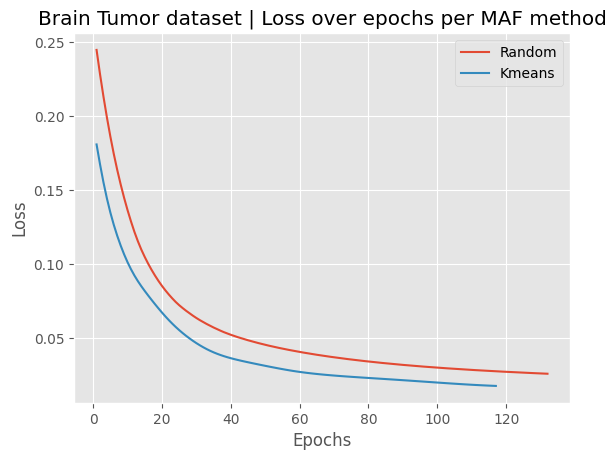

C:\Users\hayk_\AppData\Local\Temp\ipykernel_25664\4031529284.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp_return["initial loss"] = df_exps["all_losses"].apply(lambda x: eval(x)[0])


Found 2 experiments for dataset breast-cancer-wisconsin


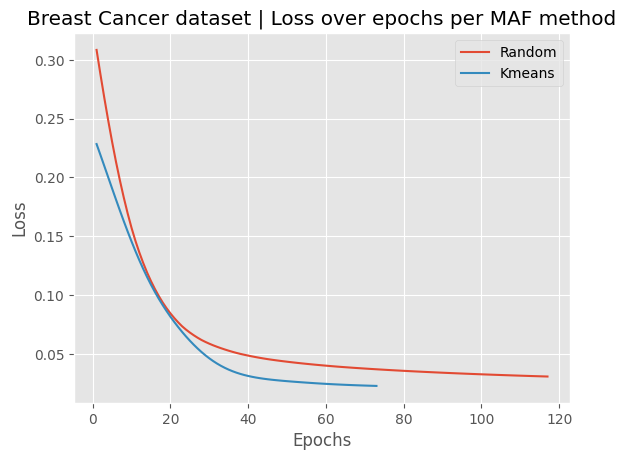

C:\Users\hayk_\AppData\Local\Temp\ipykernel_25664\4031529284.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp_return["initial loss"] = df_exps["all_losses"].apply(lambda x: eval(x)[0])


Found 2 experiments for dataset gaussian_df


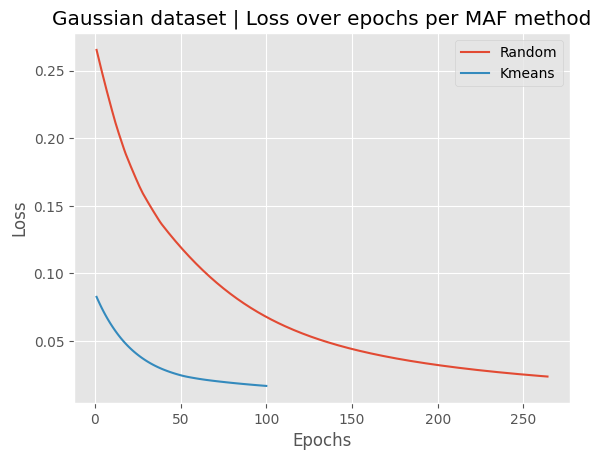

C:\Users\hayk_\AppData\Local\Temp\ipykernel_25664\4031529284.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp_return["initial loss"] = df_exps["all_losses"].apply(lambda x: eval(x)[0])


Found 2 experiments for dataset rectangle_df


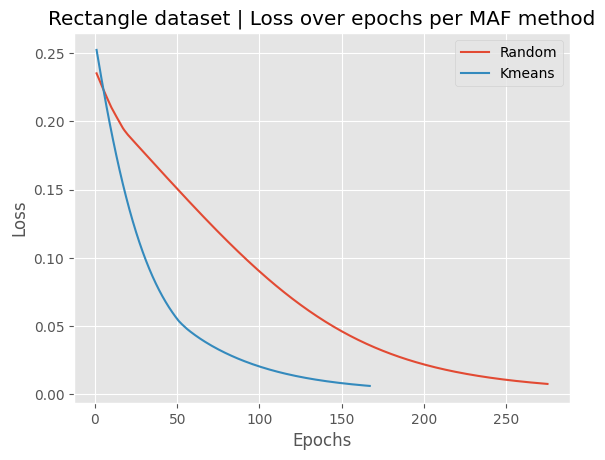

C:\Users\hayk_\AppData\Local\Temp\ipykernel_25664\4031529284.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp_return["initial loss"] = df_exps["all_losses"].apply(lambda x: eval(x)[0])


Found 2 experiments for dataset uniform_df


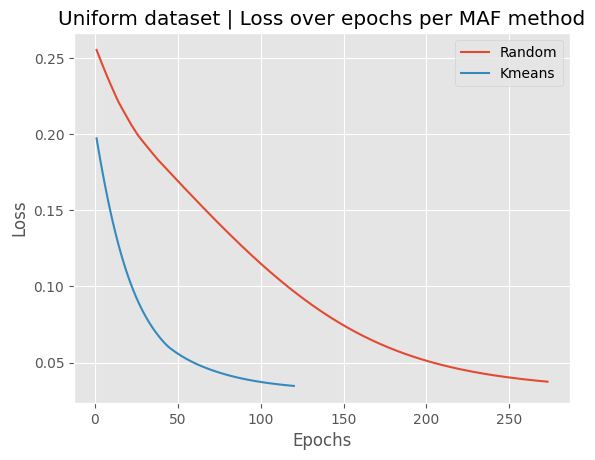

C:\Users\hayk_\AppData\Local\Temp\ipykernel_25664\4031529284.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp_return["initial loss"] = df_exps["all_losses"].apply(lambda x: eval(x)[0])


In [32]:
df_exp_export = pd.DataFrame()
df_rule_importances = {}
for data in datasets:
    if "wine" in data:
        continue
    # if "breast" not in data:
    #     continue
    data = data.split(".")[0]
    d = perform_all_for_dataset(rule_dfs_all, df_exps_all, data)#.to_latex()
    # df_rule_importances[data] = d["scores"]
    df_exp_export = pd.concat([df_exp_export, d])
        


In [26]:
df_exp_export

,dataset,clustering_alg,MAF method,accuracy,f1,training_time,epochs,min_loss,initial loss
0,Brain Tumor,kmeans,clustering,0.981399,0.979512,138.469266,117,0.017742,0.181
1,Brain Tumor,kmeans,random,0.983171,0.981354,157.075140,132,0.025984,0.245
4,breast-cancer-wisconsin,kmeans,clustering,0.975610,0.965986,17.243015,73,0.022736,0.228
5,breast-cancer-wisconsin,kmeans,random,0.975610,0.965986,19.629939,117,0.030730,0.308
8,gaussian_df,kmeans,clustering,0.986667,0.987500,15.792498,100,0.016695,0.083
9,gaussian_df,kmeans,random,0.986667,0.987500,39.058897,264,0.023637,0.265
12,rectangle_df,kmeans,clustering,1.000000,1.000000,61.031735,167,0.006148,0.252
13,rectangle_df,kmeans,random,1.000000,1.000000,98.640162,275,0.007604,0.235
16,uniform_df,kmeans,clustering,0.973333,0.969697,20.683089,120,0.034655,0.197
17,uniform_df,kmeans,random,0.973333,0.969697,39.207926,273,0.037446,0.255


In [25]:
df_exp_export["initial loss"] = df_exp_export["initial loss"].round(3)
df_exp_export["initial loss"]

0     0.181
1     0.245
4     0.228
5     0.308
8     0.083
9     0.265
12    0.252
13    0.235
16    0.197
17    0.255
Name: initial loss, dtype: float64

In [ ]:
& 0.181
& 0.245
& 0.228
& 0.308
& 0.083
& 0.265
& 0.252
& 0.235
& 0.197
& 0.255

In [1]:
df_rule_importances

NameError: name 'df_rule_importances' is not defined

In [21]:
reformatted_df = pd.DataFrame()
what_to_do = "score"
for dataset, data in df_rule_importances.items():
    # Flatten the DataFrame and rename columns appropriately
    for index in data.index:
        mean_kmeans = data.at[index, f'{what_to_do}_kmeans']
        mean_random = data.at[index, f'{what_to_do}_random']
        reformatted_df = pd.concat([reformatted_df, pd.DataFrame({
            f'{index}_kmeans': [mean_kmeans],
            f'{index}_random': [mean_random]
        }, index=[dataset])])

# Consolidate rows for each dataset into a single row
final_df_rules_unc = reformatted_df.groupby(reformatted_df.index).first().reset_index()
final_df_rules_unc.replace(DATASET_NAME_MAP, inplace=True)
final_df_rules_unc.rename(columns={'index': 'Dataset'}, inplace=True)
# rename 50% to median
final_df_rules_unc.rename(columns={'50%_kmeans': 'median_kmeans', '50%_random': 'median_random'}, inplace=True)
# replace kmeans with clustering
final_df_rules_unc.rename(columns={'mean_kmeans': 'mean_clustering', 'median_kmeans': 'median_clustering'}, inplace=True)
final_df_rules_unc["improvement factor"] = final_df_rules_unc["median_random"] / final_df_rules_unc["median_clustering"] 
final_df_rules_unc.to_latex(f"paper/{what_to_do}.tex", index=False, float_format=lambda x: '%.3f' % x)

KeyError: 'median_random'

In [112]:
final_df_rules_unc["improvement factor"].mean()

2.616066019414281

In [45]:
df_exp_export = df_exp_export.drop("clustering_alg", axis=1)
df_exp_export.dataset.replace(DATASET_NAME_MAP, inplace=True)	

C:\Users\hayk_\AppData\Local\Temp\ipykernel_20392\3440044336.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_exp_export.dataset.replace({"breast-cancer-wisconsin": "Breast Cancer", "gaussian_df": "Gaussian", "rectangle_df": "Rectangle", "uniform_df": "Uniform"}, inplace=True)


In [46]:
df_exp_export = df_exp_export.round(3)
df_exp_export

,dataset,MAF method,accuracy,f1,training_time,epochs,min_loss
0,Brain Tumor,clustering,0.981,0.980,138.469,117,0.018
1,Brain Tumor,random,0.983,0.981,157.075,132,0.026
4,Breast Cancer,clustering,0.976,0.966,17.243,73,0.023
5,Breast Cancer,random,0.976,0.966,19.630,117,0.031
8,Gaussian,clustering,0.987,0.988,15.792,100,0.017
9,Gaussian,random,0.987,0.988,39.059,264,0.024
12,Rectangle,clustering,1.000,1.000,61.032,167,0.006
13,Rectangle,random,1.000,1.000,98.640,275,0.008
16,Uniform,clustering,0.973,0.970,20.683,120,0.035
17,Uniform,random,0.973,0.970,39.208,273,0.037


In [47]:
dataset  MAF method accuracy     f1 training_time epochs min_loss
0     Brain Tumor  clustering    0.981   0.98       138.469    117    0.018
1     Brain Tumor      random    0.983  0.981       157.075    132    0.026
4   Breast Cancer  clustering    0.976  0.966        17.243     73    0.023
5   Breast Cancer      random    0.976  0.966         19.63    117    0.031
8        Gaussian  clustering    0.987  0.988        15.792    100    0.017
9        Gaussian      random    0.987  0.988        39.059    264    0.024
12      Rectangle  clustering      1.0    1.0        61.032    167    0.006
13      Rectangle      random      1.0    1.0         98.64    275    0.008
16        Uniform  clustering    0.973   0.97        20.683    120    0.035
17        Uniform      random    0.973   0.97        39.208    273    0.037


  # df_exp_export = pd.concat([df_exp_export, d])
    
    # method = "kmeans"

    # # d[f"raio_{method}"] = d[f"mass_second_{method}"] / d[f"mass_first_{method}"]
    # for method in ["kmeans", "random"]: 
    #     d[f'ratio_{method}'] = np.where(d[f'mass_first_{method}'] > d[f'mass_second_{method}'],
    #                         d[f'mass_first_{method}'] / (d[f'mass_second_{method}'] + 1e-2),
    #                         d[f'mass_second_{method}'] / (d[f'mass_first_{method}'] + 1e-2))
    #     d["1_min_uncertainty"] = 1 - d[f"uncertainty_{method}"]
        
    #     d[f"ratio_min_max_scaled_{method}"] = (d[f'ratio_{method}'] - d[f'ratio_{method}'].min()) / (d[f'ratio_{method}'].max() - d[f'ratio_{method}'].min())
        
    #     # harmonic mean
    #     d[f"score_{method}"] = 2 / (1/d[f"1_min_uncertainty"] + 1/d[f"ratio_min_max_scaled_{method}"]) 
        
    # def most_imp(d, alg, rules_percantage=0.2):
    #     score = d.sort_values(by=f"score_{alg}", ascending=False)
    #     unc = d.sort_values(f"uncertainty_{alg}")  
    #     # num of rules in top 10 that 
        
    #     num_rules = int(len(score) * rules_percantage)
    #     print(num_rules)
    #     score_top = set(score.rule.iloc[:num_rules].to_list()) 
    #     unc_top = set(unc.rule.iloc[:num_rules].to_list()) 
    #     return len(score_top & unc_top) / num_rules
        
    # # for method in ["kmeans", "random"]: 
    # res[data] = {}
    # res[data]["kmeans"] = most_imp(d, "kmeans")
    # res[data]["random"] = most_imp(d, "random")
    

SyntaxError: invalid syntax (629189957.py, line 1)

In [48]:
# round by 3 digits
df_exp_export = df_exp_export.round(3).astype(str)  # round and convert to string
print(df_exp_export)
# change order of first 2 columns 
cols = df_exp_export.columns.tolist()
cols = [cols[1]] + [cols[0]] + cols[2:]
df_exp_export = df_exp_export[cols]
print(df_exp_export)
# df_exp_export.to_latex("paper/df_exp.tex", index=False)

          dataset  MAF method accuracy     f1 training_time epochs min_loss
0     Brain Tumor  clustering    0.981   0.98       138.469    117    0.018
1     Brain Tumor      random    0.983  0.981       157.075    132    0.026
4   Breast Cancer  clustering    0.976  0.966        17.243     73    0.023
5   Breast Cancer      random    0.976  0.966         19.63    117    0.031
8        Gaussian  clustering    0.987  0.988        15.792    100    0.017
9        Gaussian      random    0.987  0.988        39.059    264    0.024
12      Rectangle  clustering      1.0    1.0        61.032    167    0.006
13      Rectangle      random      1.0    1.0         98.64    275    0.008
16        Uniform  clustering    0.973   0.97        20.683    120    0.035
17        Uniform      random    0.973   0.97        39.208    273    0.037
    MAF method        dataset accuracy     f1 training_time epochs min_loss
0   clustering    Brain Tumor    0.981   0.98       138.469    117    0.018
1       rand

In [54]:
def ratio_calc(group):
    ratios = {}
    # Get data for clustering and random methods
    clustering = group[group['MAF method'] == 'clustering']
    random = group[group['MAF method'] == 'random']
    
    # Calculate the ratios
    # make calss below numeric type
    clustering['accuracy'] = pd.to_numeric(clustering['accuracy'])
    random['accuracy'] = pd.to_numeric(random['accuracy'])
    clustering['f1'] = pd.to_numeric(clustering['f1'])
    random['f1'] = pd.to_numeric(random['f1'])
    clustering['training_time'] = pd.to_numeric(clustering['training_time'])
    random['training_time'] = pd.to_numeric(random['training_time'])
    
    ratios['accuracy_ratio'] = clustering['accuracy'].values[0] / random['accuracy'].values[0]
    ratios['f1_ratio'] = clustering['f1'].values[0] / random['f1'].values[0]
    ratios['training_time_speedup'] =  random['training_time'].values[0] / clustering['training_time'].values[0]
    
    return pd.Series(ratios)

# Apply the function to each dataset group and reset index for better format
ratios_df = df_exp_export.groupby('dataset').apply(ratio_calc).reset_index()

# Display the new DataFrame
ratios_df.round(2).to_latex("paper/df_exp_imporvements.tex", index=False)

C:\Users\hayk_\AppData\Local\Temp\ipykernel_20392\1286850156.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ratios_df = df_exp_export.groupby('dataset').apply(ratio_calc).reset_index()


In [55]:
ratios_df["training_time_speedup"].mean()

1.6516015574066618

In [64]:
pd.DataFrame(res).round(2).rename({"kmeans":"clustering"})


,Brain Tumor,breast-cancer-wisconsin,gaussian_df,rectangle_df,uniform_df,wine
clustering,0.56,0.43,1.0,1.0,1.0,1.0
random,1.00,1.00,1.0,1.0,1.0,0.5


# new scoring method

In [15]:
d.head(2)

,rule,mass_first_kmeans,mass_second_kmeans,uncertainty_kmeans,mass_first_random,mass_second_random,uncertainty_random
0,clump_thickness < 2.569,0.725134,0.111726,0.16314,0.336098,0.0,0.663902
1,2.569 < clump_thickness < 4.454,0.638576,0.183734,0.17769,0.367823,0.0,0.632177


In [24]:
method = "kmeans"



# d[f"raio_{method}"] = d[f"mass_second_{method}"] / d[f"mass_first_{method}"]
for method in ["kmeans", "random"]: 
    d[f'ratio_{method}'] = np.where(d[f'mass_first_{method}'] > d[f'mass_second_{method}'],
                        d[f'mass_first_{method}'] / (d[f'mass_second_{method}'] + 1e-2),
                        d[f'mass_second_{method}'] / (d[f'mass_first_{method}'] + 1e-2))
    d["1_min_uncertainty"] = 1 - d[f"uncertainty_{method}"]
    
    d[f"ratio_min_max_scaled_{method}"] = (d[f'ratio_{method}'] - d[f'ratio_{method}'].min()) / (d[f'ratio_{method}'].max() - d[f'ratio_{method}'].min())
    
    # harmonic mean
    d[f"score_{method}"] = 2 / (1/d[f"1_min_uncertainty"] + 1/d[f"ratio_min_max_scaled_{method}"]) 

In [31]:
d.head(1)

,rule,mass_first_kmeans,mass_second_kmeans,uncertainty_kmeans,mass_first_random,mass_second_random,uncertainty_random,ratio_kmeans,ratio_random,1_min_uncertainty,ratio_min_max_scaled_kmeans,score_kmeans,ratio_min_max_scaled_random,score_random
0,clump_thickness < 2.569,0.725134,0.111726,0.16314,0.336098,0.0,0.663902,5.9571,33.60984,0.336098,0.059571,0.111225,0.760554,0.466184


In [41]:
def most_imp(d, alg, rules_percantage=0.1):
    score = d.sort_values(by=f"score_{alg}", ascending=False)
    unc = d.sort_values(f"uncertainty_{alg}")  
    # num of rules in top 10 that 
    
    num_rules = int(len(score) * rules_percantage)
    score_top = set(score.rule.iloc[:num_rules].to_list()) 
    unc_top = set(unc.rule.iloc[:num_rules].to_list()) 
    print(len(score_top & unc_top) / num_rules)
    
most_imp(d, "kmeans")

0.3333333333333333


['Brain Tumor.csv',
 'breast-cancer-wisconsin.csv',
 'gaussian_df.csv',
 'rectangle_df.csv',
 'uniform_df.csv',
 'wine.csv']

In [173]:
df_exps_all.columns

Index(['datetime', 'name', 'MAF method', 'dataset', 'breaks', 'mult_rules',
       'accuracy', 'f1', 'confusion_matrix', 'training_time', 'epochs',
       'min_loss', 'all_losses', 'clustering_alg', 'label_for_dist'],
      dtype='object')

# Misc

29-Apr-24 18:13:03 [DEBUG] locator: <matplotlib.ticker.AutoLocator object at 0x000001F4F65B57E0>


<Axes: xlabel='x', ylabel='y'>

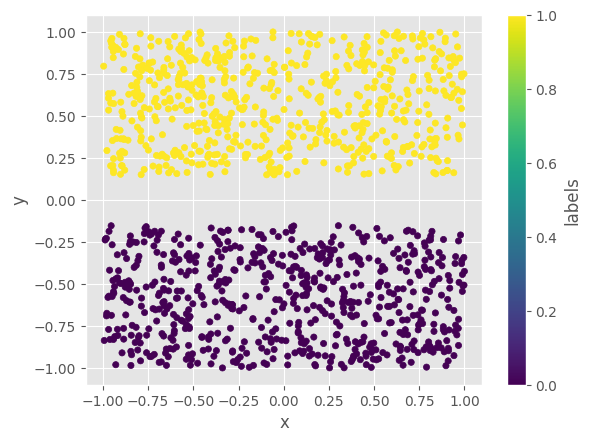

In [38]:
a = pd.read_csv("datasets/rectangle_df.csv")
a.plot(x="x", y="y", kind="scatter", c="labels", colormap='viridis')

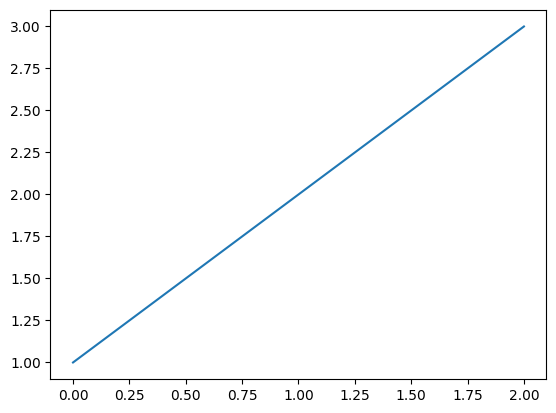

In [30]:
a = plt.plot([1,2,3])

# to latex


In [27]:
inds = [3, 31, 18, 7, 15, 34, 18]
merged["ratio"] = merged["mass_second_kmeans"] / merged["mass_first_kmeans"]
m = merged.sort_values(by="uncertainty_kmeans", ascending=True)
a = px.scatter(m.loc[inds], x="uncertainty_kmeans", y="ratio", hover_data=["rule"])

NameError: name 'merged' is not defined

In [60]:
m.loc[[7, 3]].drop(["mass_first_random", "mass_second_random",	"uncertainty_random"],axis=1)

,rule,mass_first_kmeans,mass_second_kmeans,uncertainty_kmeans,ratio
7,size_uniformity > 5.134,0.140512,0.534107,0.325381,3.801164
3,clump_thickness > 6.339,0.074992,0.590052,0.334956,7.868188


In [7]:
rules_info = pickle.load(open(f"{RULE_FOLDER}/{rules[0]}", "rb"))

c:\Users\hayk_\.conda\envs\thesis\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
name_1 = "kmeans_wine.csv, 3 single breaks, maf_method=random.dsb"
name_2 = "kmeans_wine.csv, 3 single breaks, maf_method=kmeans.dsb"

In [13]:
rules_info_random = pickle.load(open(f"{RULE_FOLDER}/{name_1}", "rb"))
rules_info_kmeans = pickle.load(open(f"{RULE_FOLDER}/{name_2}", "rb"))

In [30]:
def extract_res(rules_info):
    rules = rules_info["preds"]
    mafs = rules_info["masses"]
    
    rule_names = [str(i) for i in rules]
    mass_first = [float(i[0]) for i in mafs]
    mass_second = [float(i[1]) for i in mafs]
    uncertainty = [float(i[2]) for i in mafs]
    
    res = {"rule": rule_names, "mass_first": mass_first, "mass_second": mass_second, "uncertainty": uncertainty}
    return res

In [31]:
kmeans = extract_res(rules_info_kmeans)
random = extract_res(rules_info_random)

In [41]:
kmeans_df = pd.DataFrame(kmeans)
random_df = pd.DataFrame(random)

# merge on rule column
merged = pd.merge(kmeans_df, random_df, on="rule", suffixes=('_kmeans', '_random'))
merged.head(1)

,rule,mass_first_kmeans,mass_second_kmeans,uncertainty_kmeans,mass_first_random,mass_second_random,uncertainty_random
0,fixed acidity < 6.350,0.231988,0.532523,0.23549,0.019433,0.287232,0.693334


In [115]:
px.bar(merged, x='rule', y=['uncertainty_kmeans', 'uncertainty_random'], 
       title='Uncertainty comparison between kmeans and random', # put bars next to each other
         barmode='group')

